In [16]:
import pandas as pd
import numpy as np
from math import radians, cos, sin, asin, sqrt

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from datetime import timedelta

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error

In [17]:
Envir = pd.read_csv("/Users/iyunhan/Desktop/Upa/first.csv",index_col=0)
Route = pd.read_csv("/Users/iyunhan/Desktop/Upa/C-001_route2.csv",index_col=0)

In [18]:
Envir.head()

,Vessel Latitude,Vessel Longitude,Vessel Speed (Kts),Vessel Heading,Wave Height (m),Wave Period (s),Wind U (m/s),Wind V (m/s)
Date,,,,,,,,
2018.1.2 0:00,34.4829,128.388,15.216400,270,2.69927,8.04325,-3.00477,-1.72004
2018.1.3 6:00,34.7016,127.885,0.096244,261,1.93231,9.16929,-3.73861,-3.41856
2018.1.3 12:00,34.1431,127.909,12.211700,182,1.72568,8.44688,-5.06831,-2.87399
2018.1.4 0:00,31.2094,124.717,10.455800,261,1.41658,8.31981,-4.03375,-2.66877
2018.1.4 6:00,31.9559,125.579,10.455800,261,1.34916,7.60229,-4.51793,-2.87219


In [19]:
Envir.tail()

,Vessel Latitude,Vessel Longitude,Vessel Speed (Kts),Vessel Heading,Wave Height (m),Wave Period (s),Wind U (m/s),Wind V (m/s)
Date,,,,,,,,
2018.12.27 18:00,5.66443,85.1721,18.2422,63,1.46807,9.59429,-13.16300,8.43438
2018.12.28 0:00,5.71861,86.5901,18.4793,63,1.45147,9.47140,-18.34170,8.81144
2018.12.28 6:00,5.85843,90.4939,17.8055,63,1.39000,8.78855,-7.17954,18.28850
2018.12.28 12:00,5.79450,88.7064,17.8055,63,1.37340,8.82082,5.72836,2.36903
2018.12.28 18:00,5.95544,93.1011,18.1530,63,1.25204,8.19883,1.08100,12.54160


In [20]:
Route.head()

,Date fro,Date to,days,Port from,Port to,Distance,T from,T to,Loaing Status,Mega-Ton-Mile,Cargo Carried,DFOC,Wave (per istance),Acc. Fatigue Inex,Win (per istance),Avg. Wave Height,Avg. Spee,Avg. Win Spee
0,2018-01-01 21:30,2018-01-03 10:19,1.5,KR0016,unkown,170,13.0,13.0,NaN,0.000,0.0,0.0,1.9,41.3,5.9,2.1,14.5,5.1
1,2018-01-03 10:19,2018-01-05 11:15,2.0,unkown,CN0603,782,13.0,12.0,NaN,0.000,0.0,0.0,1.5,30.9,3.6,1.5,5.0,3.6
2,2018-01-05 11:15,2018-01-06 15:34,1.2,CN0603,KR0080,1380,12.0,16.0,NaN,656.393,71570.0,0.0,1.4,19.5,1.9,1.5,10.5,4.6
3,2018-01-06 15:34,2018-01-09 4:43,2.5,KR0080,CN0200,1048,16.0,12.0,NaN,0.000,0.0,0.0,2.0,98.3,7.3,2.1,2.7,6.4
4,2018-01-09 4:43,2018-01-10 16:55,1.5,CN0200,CN0565,976,12.0,12.0,NaN,0.000,0.0,0.0,2.2,69.8,3.8,2.1,18.0,3.7


In [21]:
Route.tail()

,Date fro,Date to,days,Port from,Port to,Distance,T from,T to,Loaing Status,Mega-Ton-Mile,Cargo Carried,DFOC,Wave (per istance),Acc. Fatigue Inex,Win (per istance),Avg. Wave Height,Avg. Spee,Avg. Win Spee
156,2018-12-22 11:29,NaN,NaN,unkown,RP4610,3716,14.0,10.0,NaN,0.0,0.0,0.0,1.5,76.9,5.2,1.5,NaN,4.6
157,2018-12-27 2:22,2018-12-29 2:14,2.0,RP4610,I0238,1623,10.0,10.0,NaN,0.0,0.0,0.0,1.5,76.9,5.2,1.5,18.2,4.6
158,2018-12-29 2:14,2018-12-30 1:30,1.0,I0238,Y0163,860,10.0,10.0,NaN,0.0,0.0,0.0,1.5,76.9,5.2,1.5,20.3,4.6
159,2018-12-30 1:30,2018-12-31 0:50,1.0,Y0163,unkown,824,10.0,10.0,NaN,0.0,0.0,0.0,1.5,76.9,5.2,1.5,19.3,4.6
160,2018-01-01 21:30,2018-12-31 0:50,363.1,NaN,NaN,214591,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.9,15.6,NaN


In [22]:
Route['Cargo Carried'].unique()
Route.nunique(dropna = False)
# 고유값들이 몇개가 있는지 확인 

Date fro              160
Date to               153
days                   44
Port from              68
Port to                68
Distance              152
T from                 10
T to                   10
Loaing Status           1
Mega-Ton-Mile          90
Cargo Carried           6
DFOC                    2
Wave (per istance)     41
Acc. Fatigue Inex     153
Win (per istance)      80
Avg. Wave Height       40
Avg. Spee              97
Avg. Win Spee          67
dtype: int64

In [23]:
Route['Cargo Carried'].value_counts()

0.0        129
17893.0     17
35785.0     12
53678.0      1
71570.0      1
Name: Cargo Carried, dtype: int64

In [24]:
Route['DFOC'].value_counts()

0.0    160
Name: DFOC, dtype: int64

In [25]:
Route['Acc. Fatigue Inex'].value_counts()


76.9     4
18.1     2
42.6     2
20.3     2
8.8      2
        ..
58.5     1
24.9     1
103.5    1
289.7    1
1.5      1
Name: Acc. Fatigue Inex, Length: 152, dtype: int64

In [26]:
fatigue = Route['Acc. Fatigue Inex'] == 3912.9
a = Route[fatigue]
a

,Date fro,Date to,days,Port from,Port to,Distance,T from,T to,Loaing Status,Mega-Ton-Mile,Cargo Carried,DFOC,Wave (per istance),Acc. Fatigue Inex,Win (per istance),Avg. Wave Height,Avg. Spee,Avg. Win Spee
83,2018-06-20 21:07,2018-07-14 8:10,23.5,CN0540,unkown,4640,7.0,7.0,NaN,0.0,0.0,0.0,3.3,3912.9,8.0,3.3,2.2,5.7


Envir 데이터와 Route데이터를 보고 판단하여, 데이터의 분석 방향을 정해본다. 

1. 측정된 속도가 환경변수의 영향을 받은것일까 ? 
2. Route 데이터에서 T from, T to의 의미가 무엇일까 ? Day에 영향을 미칠까?
3. DFOC와 Carried Cargo의 0값이 의미있는 값 혹은 결측치로 처리해야될까?
4. Heading의 방향에 따라 환경이 영향을 + ~ - 로 미치지 않을까 ? 
5. 피로도의 분포가 차이가 매우 큰데, 높고 낮음 으로 분류하는것이 좋지 않을까 ? -> 3900의 아웃라이어 제외 후 3단계분류


In [38]:
a.fillna(method = 'pad')
Route = a.drop(['Loaing Status'],axis = 1, inplace = True)

In [39]:
a.describe()

,days,Distance,T from,T to,Mega-Ton-Mile,Cargo Carried,DFOC,Wave (per istance),Acc. Fatigue Inex,Win (per istance),Avg. Wave Height,Avg. Spee,Avg. Win Spee
count,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,23.5,4640.0,7.0,7.0,0.0,0.0,0.0,3.3,3912.9,8.0,3.3,2.2,5.7
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,23.5,4640.0,7.0,7.0,0.0,0.0,0.0,3.3,3912.9,8.0,3.3,2.2,5.7
25%,23.5,4640.0,7.0,7.0,0.0,0.0,0.0,3.3,3912.9,8.0,3.3,2.2,5.7
50%,23.5,4640.0,7.0,7.0,0.0,0.0,0.0,3.3,3912.9,8.0,3.3,2.2,5.7
75%,23.5,4640.0,7.0,7.0,0.0,0.0,0.0,3.3,3912.9,8.0,3.3,2.2,5.7
max,23.5,4640.0,7.0,7.0,0.0,0.0,0.0,3.3,3912.9,8.0,3.3,2.2,5.7


In [40]:
a

,Date fro,Date to,days,Port from,Port to,Distance,T from,T to,Mega-Ton-Mile,Cargo Carried,DFOC,Wave (per istance),Acc. Fatigue Inex,Win (per istance),Avg. Wave Height,Avg. Spee,Avg. Win Spee
83,2018-06-20 21:07,2018-07-14 8:10,23.5,CN0540,unkown,4640,7.0,7.0,0.0,0.0,0.0,3.3,3912.9,8.0,3.3,2.2,5.7


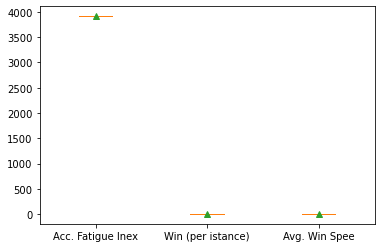

In [42]:
data = [a['Acc. Fatigue Inex'], 
        a['Win (per istance)'],
        a['Avg. Win Spee']]

plt.boxplot(data, labels=['Acc. Fatigue Inex', 'Win (per istance)', 'Avg. Win Spee'], showmeans=True)
plt.show()

Wind의 경우 특별한 이상치는 보이지 않고, 피로지수의 경우 하나의 outlier가 명확하게 보이고, 나머지는 3단계 정도로 
분류가 가능해 보인다. 

In [43]:
Envir.head()

,Vessel Latitude,Vessel Longitude,Vessel Speed (Kts),Vessel Heading,Wave Height (m),Wave Period (s),Wind U (m/s),Wind V (m/s)
Date,,,,,,,,
2018.1.2 0:00,34.4829,128.388,15.216400,270,2.69927,8.04325,-3.00477,-1.72004
2018.1.3 6:00,34.7016,127.885,0.096244,261,1.93231,9.16929,-3.73861,-3.41856
2018.1.3 12:00,34.1431,127.909,12.211700,182,1.72568,8.44688,-5.06831,-2.87399
2018.1.4 0:00,31.2094,124.717,10.455800,261,1.41658,8.31981,-4.03375,-2.66877
2018.1.4 6:00,31.9559,125.579,10.455800,261,1.34916,7.60229,-4.51793,-2.87219


In [44]:
Envir.nunique(dropna = False)
# 고유값들이 몇개가 있는지 확인 

Vessel Latitude        816
Vessel Longitude       835
Vessel Speed (Kts)     923
Vessel Heading         238
Wave Height (m)       1107
Wave Period (s)       1107
Wind U (m/s)          1108
Wind V (m/s)          1109
dtype: int64

In [45]:
Envir.describe()

,Vessel Latitude,Vessel Longitude,Vessel Speed (Kts),Vessel Heading,Wave Height (m),Wave Period (s),Wind U (m/s),Wind V (m/s)
count,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000
mean,32.588962,57.297579,11.999826,184.897390,1.958554,7.623279,-0.186473,0.478498
std,15.934348,50.427162,42.221443,114.056831,1.188163,2.599084,4.522671,4.152089
min,1.096510,-10.159100,0.000000,0.000000,0.055058,1.928760,-18.341700,-12.643900
25%,22.572700,8.516080,0.005018,101.500000,1.007805,5.684545,-2.984440,-2.031630
50%,35.077300,44.210500,12.501600,182.000000,1.806180,7.935650,-0.349956,0.277974
75%,44.588900,119.491000,18.414500,290.000000,2.738395,9.473295,2.592535,2.500470
max,57.829700,128.821000,1017.940000,359.000000,8.030030,15.063200,22.047400,18.288500


vessel heading의 경우 0~359의 데이터 형태로 선체의 방향을 360도를 기준으로 표현한 것으로 추정해볼수 있다. 
또한, Wind U, Wind V 같은 경우로 바람의 벡터 방향을 추정해볼수있다. ex, 4.5, 4.15라면 (4.5,4.15)의 방향으로 바람이 부는것으로 생각할 수 있다. 


In [46]:
EnvirNoNan = Envir.dropna(axis=0)


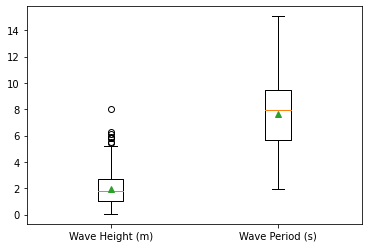

In [47]:
data = [EnvirNoNan['Wave Height (m)'], 
        EnvirNoNan['Wave Period (s)']]

plt.boxplot(data, labels=['Wave Height (m)', 'Wave Period (s)'], showmeans=True)
plt.show()

파고의 높이도 높음, 낮음으로 분류하는것이 좋을것같기도함 

In [48]:
Effi = pd.read_csv("/Users/iyunhan/Desktop/Upa/Efficiency.csv",index_col=0)

In [49]:
Effi.head()

,Date,Vessel Latitude,Vessel Longitude,Vessel Speed (Kts),Vessel Heading,Wave Height (m),Wave Period (s),Wind U (m/s),Wind V (m/s),Wind Theta,Wind Size,Efficiency
No.,,,,,,,,,,,,
0,2018.1.1 6:00,35.0773,128.787,0.000000,270,2.30386,7.01473,-3.253640,0.723772,282.541240,3.333170,7.679156
1,2018.1.1 12:00,35.0773,128.787,0.003202,270,2.39846,6.71284,-0.960368,-1.576920,211.342043,1.846343,4.428380
2,2018.1.1 18:00,35.0773,128.787,0.002844,270,2.57832,7.12513,-2.059540,-4.367280,205.247822,4.828544,12.449532
3,2018.1.2 0:00,34.4829,128.388,15.216400,270,2.69927,8.04325,-3.004770,-1.720040,240.211603,3.462251,9.345550
4,2018.1.3 0:00,34.7050,127.875,0.096244,261,2.10138,9.64112,-4.465280,-4.021640,227.992321,6.009352,12.627933


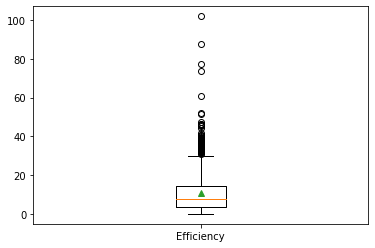

In [50]:
dataEf = [Effi['Efficiency']]

plt.boxplot(dataEf, labels=['Efficiency'], showmeans=True)
plt.show()

<AxesSubplot:>

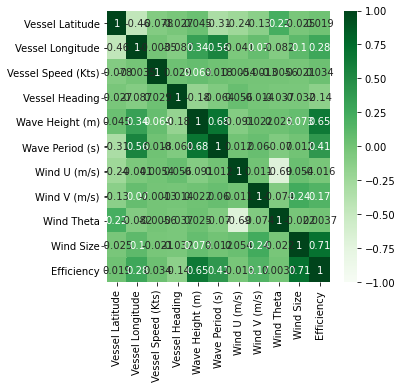

In [51]:
#heatmap으로 상관관계를 표시


import seaborn as sb
plt.rcParams["figure.figsize"] = (5,5)
sb.heatmap(Effi.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )

Effi -> wind size와 Wave Height에 영향, Wave Period에도 어느정도 영향 